In [ ]:
import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense, Dropout

<h1> Loading the data </h1>

In [ ]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

<h1> Data Preparation </h1>

we're going to encode each sequence (review) and transform it into a vector which had dimension of 10000.

In [ ]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [ ]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
y_train = np.array(train_labels, dtype = 'float32')
y_test = np.array(test_labels, dtype = 'float32')

<h1>Building the Neural Network</h1>

we are gonna use *Early stopping* so that if the loss started increasing, the model will stop learning and will restore the best weights.

In [ ]:
es = keras.callbacks.EarlyStopping(monitor='val_loss', 
                                   mode='min', 
                                   patience=2,
                                   restore_best_weights=True)


In [ ]:
#set up the model
model = Sequential()
#Adding the first dense layer
model.add(Dense(24, activation = 'relu', input_shape = (10000,)))
model.add(Dropout(0.5))
#Adding the second layer
model.add(Dense(16, activation = 'relu'))
model.add(Dropout(0.5))
#Adding the output layer
model.add(Dense(1, activation = 'sigmoid'))

#Compile the model
model.compile(optimizer = 'adam', loss='binary_crossentropy', metrics = ['Accuracy'])

#Fitting the model
history = model.fit(x_train, y_train, epochs = 20, batch_size = 32, validation_data= (x_test, y_test), callbacks = [es])

Epoch 1/20
782/782 [==============================] - 9s 10ms/step - loss: 0.4574 - Accuracy: 0.7893 - val_loss: 0.3006 - val_Accuracy: 0.8760
Epoch 2/20
782/782 [==============================] - 6s 8ms/step - loss: 0.2979 - Accuracy: 0.8884 - val_loss: 0.2865 - val_Accuracy: 0.8816
Epoch 3/20
782/782 [==============================] - 6s 8ms/step - loss: 0.2427 - Accuracy: 0.9086 - val_loss: 0.2959 - val_Accuracy: 0.8788
Epoch 4/20
782/782 [==============================] - 6s 8ms/step - loss: 0.2111 - Accuracy: 0.9194 - val_loss: 0.3227 - val_Accuracy: 0.8774


In [ ]:
loss, acc = model.evaluate(x_test, test_labels,
                            batch_size=32)
print('Test loss:', loss)
print('Test accuracy:', acc)

782/782 [==============================] - 4s 4ms/step - loss: 0.2865 - Accuracy: 0.8816
Test score: 0.2865370810031891
Test accuracy: 0.881600022315979


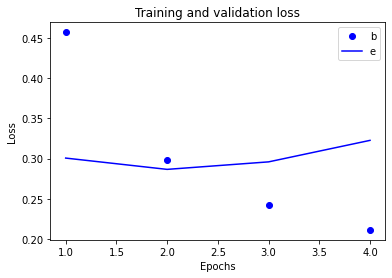

In [ ]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, (len(history.history['loss']) + 1))
plt.plot(epochs, train_loss,'o', color = 'b', label='Training loss')
plt.plot(epochs, val_loss,label='Validation loss', color = 'b')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend('best')
plt.show()

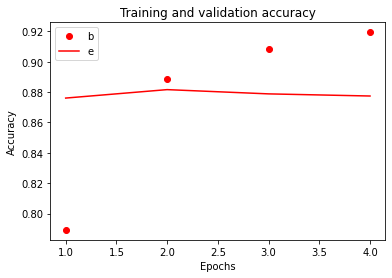

In [ ]:
train_acc = history.history['Accuracy']
val_acc = history.history['val_Accuracy']
epochs = range(1, (len(history.history['loss']) + 1))
plt.plot(epochs, train_acc, 'o',color = 'red', label='Training Accuracy')
plt.plot(epochs, val_acc,color= 'red', label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend('best')
plt.show()